In [3]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

## Time Series

In [4]:
def read_data(file):
    data = pd.read_csv(file)
    data['Late'] = [1 if line > 0 else 0 for line in data['days_late']]
    return data

In [5]:
def arima_model_summary(supplier):

    data = read_data('model_data3.csv')

    Royal = data[data['Supplier'] == supplier]
    Royal = Royal[['Late', 'Posting_Date']].reset_index()
    Royal['Date'] = pd.to_datetime(Royal['Posting_Date'])

    df = Royal.groupby([pd.Grouper(key='Date', freq='MS')])['Late'].agg(['mean']).reset_index()

    time_series = pd.Series(data= df['mean'].tolist(), index = df['Date'])

    model = auto_arima(time_series)

    model.plot_diagnostics(figsize=(15,8))
    plt.show()
    print(model.summary())

    return model

/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid va

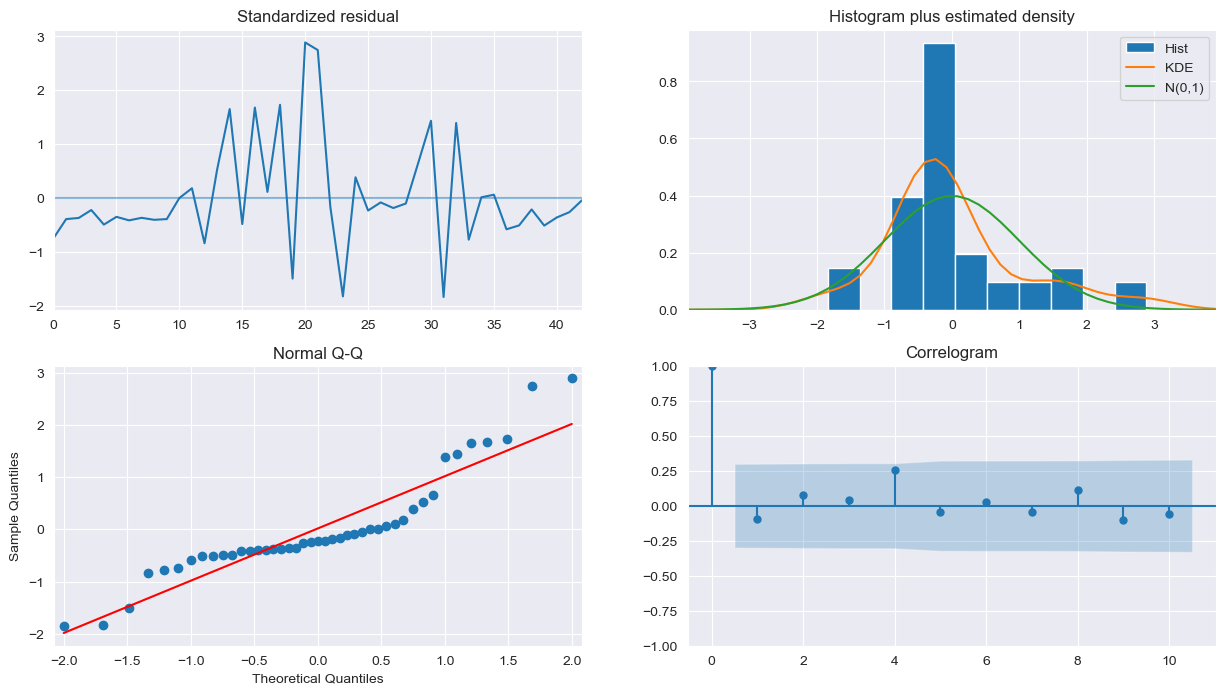

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  68.269
Date:                Sun, 16 Oct 2022   AIC                           -130.538
Time:                        18:54:49   BIC                           -125.255
Sample:                             0   HQIC                          -128.590
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.015      1.285      0.199      -0.010       0.049
ar.L1          0.5659      0.121      4.660      0.000       0.328       0.804
sigma2         0.0024      0.001      4.840      0.0

NameError: name 'df' is not defined

In [6]:
def arima_forecast(model):

    # Forecast
    n_months = 3
    fc = model.predict(n_periods = n_months)
    index_of_fc = pd.date_range(df['Date'][len(df['Date']) - 1], periods = n_months, freq= 'M')

    # make series for plotting purpose
    fc_series = pd.Series(fc, index= index_of_fc)

    # Plot
    fig, ax = plt.subplots(figsize=(15,9))
    ax.plot(time_series)
    ax.plot(fc_series, color='red')

    ax.set_title("Final Forecast")
    ax.figure.autofmt_xdate()
    plt.show()


arima_forecast(arima_model_summary("ROYAL TECHNOLOGIES CORPORATION"))